<a href="https://colab.research.google.com/github/3bdo-Yahya/Image-Processing/blob/main/Section_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(1825.5), np.float64(2018.5), np.float64(-0.5))

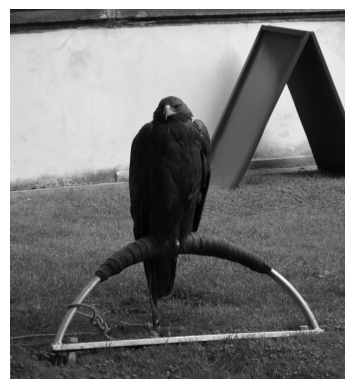

In [ ]:
from skimage import data
image = data.eagle()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image); plt.axis('off')

In [ ]:
print(image.shape)  # Print the shape of the image

(2019, 1826, 3)


(np.float64(-0.5), np.float64(1825.5), np.float64(2018.5), np.float64(-0.5))

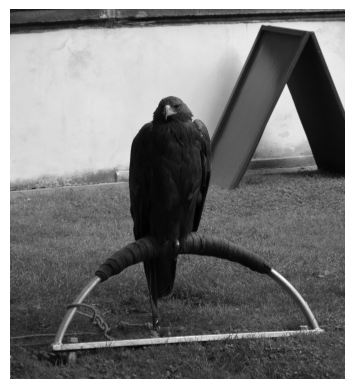

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray'); plt.axis('off')

In [ ]:
# Initialize empty noise array matching grayscale image dimensions
gauss_noise = np.zeros(image_gray.shape, dtype=np.uint8)

# Calculate mean and standard deviation from the image (alternative: use defaults mean=128, stddev=20)
mean, stddev = cv2.meanStdDev(image_gray)

# Display calculated mean and standard deviation values
print(mean, stddev)

[[108.26574405]] [[71.46528805]]


In [ ]:
# Fill the gauss_noise array with random values from Gaussian distribution
cv2.randn(gauss_noise, mean, stddev)

array([[ 29,  71,  56, ...,   0,  85, 138],
       [ 79, 150,  15, ..., 255, 120, 166],
       [ 73,  54,  80, ...,  85,  59,  30],
       ...,
       [ 41,  61, 129, ...,  61,  51,   0],
       [124, 144, 163, ..., 224,  11,  15],
       [  0, 118,  88, ..., 213, 193,  75]], dtype=uint8)

In [ ]:
# Scale down noise intensity by 50% to make it less aggressive
gauss_noise = (gauss_noise * 0.5).astype(np.uint8)

(np.float64(-0.5), np.float64(1825.5), np.float64(2018.5), np.float64(-0.5))

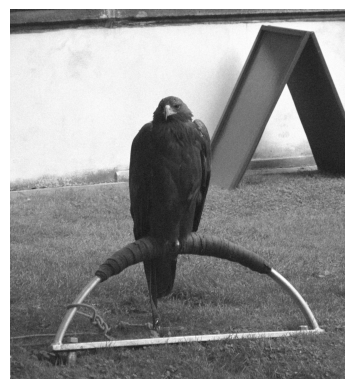

In [ ]:
# Add Gaussian noise to the grayscale image
image_gauss_noisy = cv2.add(image_gray, gauss_noise)
plt.imshow(image_gauss_noisy, cmap='gray'); plt.axis('off')

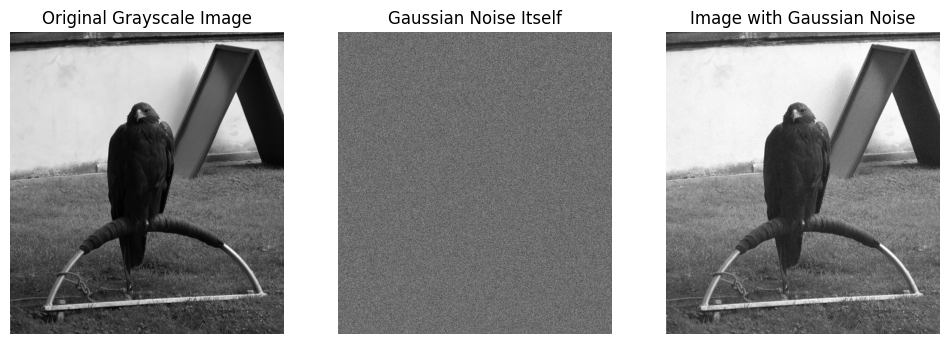

In [ ]:
# Display original, noise, and noisy image side by side for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray'); plt.axis('off')
plt.title('Original Grayscale Image')
plt.subplot(1, 3, 2)
plt.imshow(gauss_noise, cmap='gray'); plt.axis('off')
plt.title('Gaussian Noise Itself')
plt.subplot(1, 3, 3)
plt.imshow(image_gauss_noisy, cmap='gray'); plt.axis('off')
plt.title('Image with Gaussian Noise')
plt.show()

Text(0.5, 1.0, 'Gaussian Blurred Image with Noise')

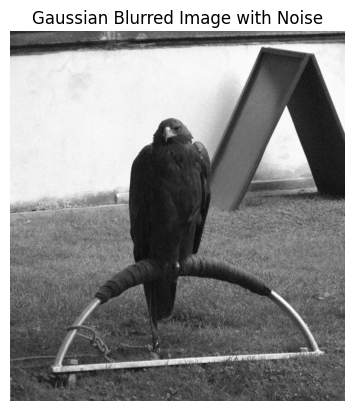

In [ ]:
# Apply Gaussian blur (5x5 kernel) to reduce Gaussian noise
image_gauss_blur = cv2.GaussianBlur(image_gauss_noisy, (5, 5), 0)
plt.imshow(image_gauss_blur, cmap='gray'); plt.axis('off')
plt.title('Gaussian Blurred Image with Noise')

Text(0.5, 1.0, 'Blurred Image with Noise')

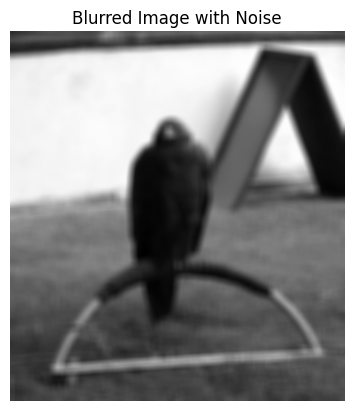

In [ ]:
# Apply averaging blur (50x50 kernel) for strong smoothing effect
image_blur = cv2.blur(image_gauss_noisy, (50, 50))
plt.imshow(image_blur, cmap='gray'); plt.axis('off')
plt.title('Blurred Image with Noise')

Text(0.5, 1.0, 'Median Blurred Image with Noise')

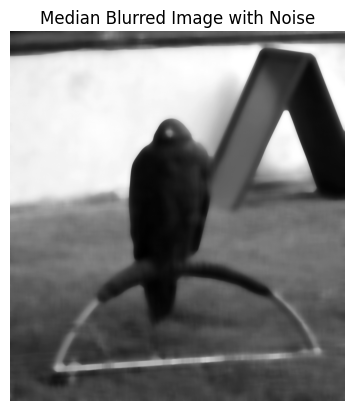

In [ ]:
# Apply median blur (49x49 kernel) - effective for salt-and-pepper noise
image_med_blur = cv2.medianBlur(image_gauss_noisy, 49)
plt.imshow(image_med_blur, cmap='gray'); plt.axis('off')
plt.title('Median Blurred Image with Noise')

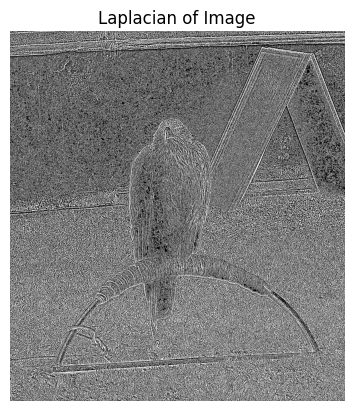

In [ ]:
# Apply Laplacian operator for edge detection (highlights rapid intensity changes)
laplacian_blur = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
plt.imshow(laplacian_blur, cmap='gray'); plt.axis('off')
plt.title('Laplacian of Image')
plt.show()

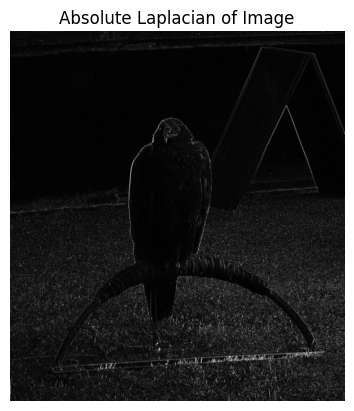

In [ ]:
# Convert Laplacian to absolute values and scale to uint8 for proper display
laplacian_blur_abs = cv2.convertScaleAbs(laplacian_blur)
plt.imshow(laplacian_blur_abs, cmap='gray'); plt.axis('off')
plt.title('Absolute Laplacian of Image')
plt.show()